In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Letter\Letter_AG_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,2.0,4.0,4.0,3.0,2,7,8,2,9,11,7.0,7,1.0,8.0,5.0,6,NaN
1,NaN,NaN,NaN,NaN,5,5,9,6,4,8,NaN,9,NaN,NaN,NaN,10,NaN
2,NaN,NaN,NaN,NaN,4,8,8,5,10,11,NaN,8,NaN,NaN,NaN,10,NaN
3,NaN,NaN,NaN,NaN,4,7,7,13,1,7,NaN,8,NaN,NaN,NaN,8,NaN
4,6.0,7.0,8.0,5.0,4,7,6,3,7,10,7.0,9,3.0,8.0,3.0,7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,NaN,NaN,NaN,NaN,3,4,10,7,8,12,NaN,9,NaN,NaN,NaN,6,NaN
19996,NaN,NaN,NaN,NaN,3,7,8,2,10,12,NaN,8,NaN,NaN,NaN,8,NaN
19997,NaN,NaN,NaN,NaN,4,7,8,7,4,10,NaN,6,NaN,NaN,NaN,7,NaN
19998,4.0,11.0,4.0,8.0,3,0,2,4,6,1,0.0,7,0.0,8.0,0.0,8,NaN


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	8000
float64		column 2	8000
float64		column 3	8000
float64		column 4	8000
int64		column 5	0
int64		column 6	0
int64		column 7	0
int64		column 8	0
int64		column 9	0
int64		column 10	0
float64		column 11	8000
int64		column 12	0
float64		column 13	8000
float64		column 14	8000
float64		column 15	8000
int64		column 16	0
float64		column 17	20000


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
count,12000.000000,12000.000000,12000.000000,12000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,12000.000000,20000.000000,12000.000000,12000.000000,12000.000000,20000.00000,0.0
mean,4.011250,7.008000,5.139083,5.341167,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.551750,7.929000,3.103083,8.356833,3.714417,7.80120,NaN
std,1.889732,3.256683,1.980589,2.229952,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.521842,2.080619,2.340672,1.525570,2.553508,1.61747,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,NaN
25%,3.000000,5.000000,4.000000,4.000000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.000000,7.000000,2.000000,8.000000,2.000000,7.00000,NaN
50%,4.000000,7.000000,5.000000,6.000000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.000000,8.000000,3.000000,8.000000,3.000000,8.00000,NaN
75%,5.000000,9.000000,6.000000,7.000000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.000000,9.000000,4.000000,9.000000,5.000000,9.00000,NaN
max,14.000000,15.000000,14.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,NaN


<AxesSubplot:>

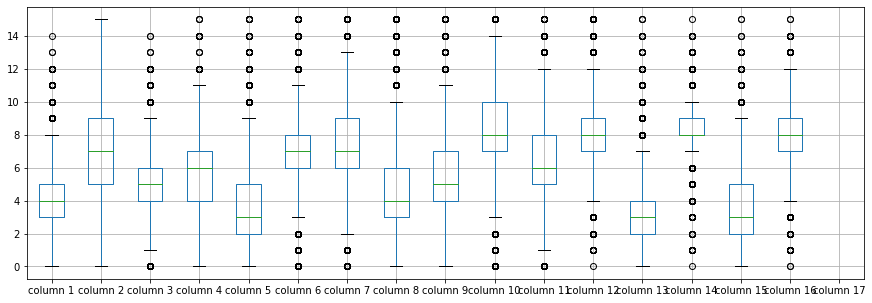

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     4.011250
column 2     7.008000
column 3     5.139083
column 4     5.341167
column 5     3.505850
column 6     6.897600
column 7     7.500450
column 8     4.628600
column 9     5.178650
column 10    8.282050
column 11    6.551750
column 12    7.929000
column 13    3.103083
column 14    8.356833
column 15    3.714417
column 16    7.801200
column 17         NaN
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
column 1,1.000000,0.755000,0.849132,0.669903,0.611645,-0.062024,0.046453,0.006793,0.011608,0.120083,0.038010,-0.073497,0.493892,0.107534,0.236536,-0.160651,NaN
column 2,0.755000,1.000000,0.671832,0.822016,0.553461,0.015361,-0.023769,-0.044086,0.057238,0.140474,-0.045024,-0.048580,0.280476,0.013617,0.196490,-0.100867,NaN
column 3,0.849132,0.671832,1.000000,0.656884,0.761318,0.028601,0.018466,-0.113817,0.031697,0.084670,0.017839,-0.064061,0.561856,0.051563,0.224961,-0.177812,NaN
column 4,0.669903,0.822016,0.656884,1.000000,0.640793,0.020149,-0.008681,0.062763,0.008628,-0.012623,-0.000695,-0.013564,0.274198,0.037877,0.265646,-0.076653,NaN
column 5,0.611645,0.553461,0.761318,0.640793,1.000000,0.139159,-0.028822,-0.011985,-0.065557,-0.069776,-0.080875,-0.038858,0.634027,0.017987,0.466996,-0.062969,NaN
column 6,-0.062024,0.015361,0.028601,0.020149,0.139159,1.000000,-0.356580,-0.053306,-0.122851,0.085963,-0.396062,-0.032115,0.126411,-0.257877,0.128626,0.248816,NaN
column 7,0.046453,-0.023769,0.018466,-0.008681,-0.028822,-0.356580,1.000000,-0.118625,-0.049658,0.178318,0.591572,-0.271649,-0.086163,0.549160,-0.125518,-0.207900,NaN
column 8,0.006793,-0.044086,-0.113817,0.062763,-0.011985,-0.053306,-0.118625,1.000000,-0.188431,-0.317780,0.027304,0.082020,0.163167,-0.078579,0.000343,0.182902,NaN
column 9,0.011608,0.057238,0.031697,0.008628,-0.065557,-0.122851,-0.049658,-0.188431,1.000000,0.132000,-0.046775,0.119048,-0.390086,-0.044068,0.244694,-0.061335,NaN
column 10,0.120083,0.140474,0.084670,-0.012623,-0.069776,0.085963,0.178318,-0.317780,0.132000,1.000000,0.025145,-0.106759,-0.215506,0.029910,-0.143701,-0.114223,NaN


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [17,17+18,17+18+18,17+18+18+18,17+18+18,17+18,17], vae_layer = False, seed = 180)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [17]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 58.323053259277344
Epoch: 1 , loss: 39.92407657775879
Epoch: 2 , loss: 37.129126834106444
Epoch: 3 , loss: 35.82011531829834
Epoch: 4 , loss: 35.17714076690674
Epoch: 5 , loss: 34.81170214080811
Epoch: 6 , loss: 34.37808151092529
Epoch: 7 , loss: 34.21553508911133
Epoch: 8 , loss: 33.838386949157716
Epoch: 9 , loss: 33.85994147338867
Training complete. Saving file...
Model saved in file: tmp/MIDAS


In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(20000, 17)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     4.406711
column 2     7.664602
column 3     5.602832
column 4     5.805477
column 5     1.000000
column 6     1.000000
column 7     1.000000
column 8     5.000000
column 9     5.000000
column 10    0.000000
column 11    6.956092
column 12    6.000000
column 13    3.322604
column 14    8.941041
column 15    3.966715
column 16    8.000000
column 17    1.284239
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Letter.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0.000000,0,0.000000,0.000000,0.000000,0,NaN
1,-0.707646,-1.482568,-0.709529,-0.623976,0,0,0,0,0,0,-1.828354,0,0.406097,-2.571259,-4.090623,0,NaN
2,-3.366514,-3.833316,-3.256885,-2.236884,0,0,0,0,0,0,3.791306,0,0.697204,2.168532,-1.701287,0,NaN
3,1.052442,0.118559,1.682192,0.032055,0,0,0,0,0,0,2.051470,0,0.671744,2.363761,4.505455,0,NaN
4,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0.000000,0,0.000000,0.000000,0.000000,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,-0.870326,-2.855982,0.277357,-2.534260,0,0,0,0,0,0,-3.302521,0,1.155521,-0.375574,1.716780,0,NaN
19996,0.009595,-0.144373,-0.920706,0.406766,0,0,0,0,0,0,0.429278,0,1.951266,-0.857061,-2.303239,0,NaN
19997,0.564165,0.106027,1.810488,0.059043,0,0,0,0,0,0,0.369572,0,0.451084,0.532827,1.346179,0,NaN
19998,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0.000000,0,0.000000,0.000000,0.000000,0,NaN


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

703.9920771009907

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

3733.8164121981144

In [18]:
NRMS=numerator/denominator
NRMS


0.18854490938576904

In [19]:
new_df.iloc[66,:]

column 1      5.345456
column 2      9.531839
column 3      6.793110
column 4      7.070916
column 5     11.000000
column 6     10.000000
column 7      5.000000
column 8      3.000000
column 9      2.000000
column 10     9.000000
column 11     8.524085
column 12     8.000000
column 13     4.112213
column 14    11.009017
column 15     4.881948
column 16     7.000000
column 17     0.491988
Name: 66, dtype: float64

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,2.000000,4.000000,4.000000,3.000000,2,7,8,2,9,11,7.000000,7,1.000000,8.000000,5.000000,6,0.286146
1,3.292354,5.517432,4.290471,4.376024,5,5,9,6,4,8,5.171646,9,2.406097,6.428741,2.909377,10,-0.506292
2,3.633486,6.166684,4.743115,4.763116,4,8,8,5,10,11,5.791306,8,2.697204,7.168532,3.298713,10,-0.498316
3,5.052442,9.118559,6.682192,7.032055,4,7,7,13,1,7,8.051470,8,3.671744,10.363761,4.505455,8,0.796944
4,6.000000,7.000000,8.000000,5.000000,4,7,6,3,7,10,7.000000,9,3.000000,8.000000,3.000000,7,0.378939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,4.129674,7.144018,5.277357,5.465740,3,4,10,7,8,12,6.697479,9,3.155521,8.624426,3.716780,6,1.066800
19996,4.009595,6.855627,5.079294,5.406766,3,7,8,2,10,12,6.429278,8,2.951266,8.142939,3.696761,8,0.563038
19997,4.564165,8.106027,5.810488,6.059043,4,7,8,7,4,10,7.369572,6,3.451084,9.532827,4.346179,7,-0.029715
19998,4.000000,11.000000,4.000000,8.000000,3,0,2,4,6,1,0.000000,7,0.000000,8.000000,0.000000,8,-0.126713


In [21]:
imputations[-1].to_excel("Letter_AG_20(imp).xlsx", index=False, header=False)